# Various test statistics used in HEP

## Test statistics

### Two sided test statistics

\begin{equation}
    t_{\mu}
    =
    -2 \ln \left[ \frac{\mathcal{L}(\mu,\hat{\hat{\nu}})}{ \mathcal{L} (\hat{\mu},\hat{\nu}) }\right]
\end{equation}

### Positive signal

\begin{equation}
    \tilde{t}_{\mu}
    =
    \begin{cases}
        -2 \ln \left[ \frac{\mathcal{L}(\mu,\hat{\hat{\nu}}(\mu))}{ \mathcal{L} (0,\hat{\hat{\nu}}(0) ) }\right] & \hat{\mu} < 0 \\
        -2 \ln \left[ \frac{\mathcal{L}(\mu,\hat{\hat{\nu}}(\mu))}{ \mathcal{L} (\hat{\mu},\hat{\nu} ) }\right] & \hat{\mu} \geq 0
    \end{cases}
\end{equation}

### For positive signal discovery

\begin{equation}
    q_{0}
    =
    \begin{cases}
    -2 \ln \left[ \frac{\mathcal{L}(0, \hat{\hat{\nu}}(0)}{ \mathcal{L}(\hat{\mu},\hat{\nu})} \right] & \hat{\mu} \leq 0, \\
    0 & \hat{\mu} < 0
    \end{cases}
\end{equation}

### For upper limits

\begin{equation}
    q_{\mu}
    =
    \begin{cases}
    -2 \ln \left[ \frac{\mathcal{L}(\mu, \hat{\hat{\nu}}(\mu))}{ \mathcal{L}(\hat{\mu},\hat{\nu})} \right] & \hat{\mu} \leq \mu, \\
    0 & \hat{\mu} > \mu
    \end{cases}
\end{equation}

\begin{equation}
    \tilde{q}_{\mu}
    =
    \begin{cases}
      -2 \ln \left[ \frac{\mathcal{L}(\mu, \hat{\hat{\nu}}(\mu))}{ \mathcal{L}(0,\hat{\hat{\nu}}(0))} \right] & \hat{\mu} < 0, \\
    -2 \ln \left[ \frac{\mathcal{L}(\mu, \hat{\hat{\nu}}(\mu))}{ \mathcal{L}(\hat{\mu},\hat{\nu})} \right] & 0\leq \hat{\mu} \leq \mu, \\
    0 & \hat{\mu} > \mu
    \end{cases}
\end{equation}

### Simplified test statistics

\begin{equation}
    g_{\mu} = \frac{(\hat{\mu} - \mu)^{2}}{\sigma^{2}_{\hat{\mu}}}
\end{equation}

Motivated by the asymptotic limit.

## Demonstration

\begin{equation}
    n \sim Poi(\lambda)
\end{equation}

\begin{equation}
    \mathcal{L}(\mu) = Poi(\lambda=\mu s_{0} + b) 
\end{equation}

without nuisance parameters

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import hepstat as hs
%matplotlib inline

In [2]:
nensemble = 1000
sample_size = 1

In [3]:
lambda_truth = 5.0

In [4]:
n_ensemble = np.array([scipy.stats.poisson.rvs(mu=lambda_truth, size=sample_size) for i in range(nensemble)])

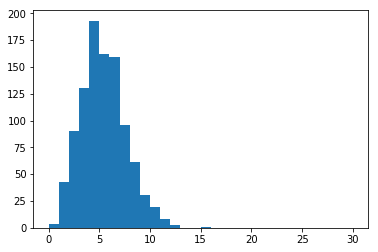

In [5]:
fig, ax = plt.subplots()
ax.hist(n_ensemble.flatten(), bins=30, range=(0.0, 30));

In [6]:
b = 3
model = hs.SimplePoissonModel(mu=5.0, b=b)

In [7]:
q0s  = np.array([model.calc_q0(n) for n in n_ensemble])

In [8]:
tmus = {}
ttildemus = {}
qmus = {}
qtildemus = {}
gmus = {}

In [9]:
mus = [2.0, 5.0, 8.0]

In [10]:
for mu in mus:
    tmu = np.array([model.calc_tmu(n,mu=mu) for n in n_ensemble])
    qmu = np.array([model.calc_qmu(n,mu=mu) for n in n_ensemble])
    ttildemu = np.array([model.calc_ttildemu(n,mu=mu) for n in n_ensemble])
    qtildemu = np.array([model.calc_qtildemu(n,mu=mu) for n in n_ensemble])
    gmu = np.array([model.calc_gmu(n,mu=mu) for n in n_ensemble])
    tmus[mu] = tmu
    ttildemus[mu] = ttildemu
    qmus[mu] = qmu
    qtildemus[mu] = qtildemu
    gmus[mu] = gmu

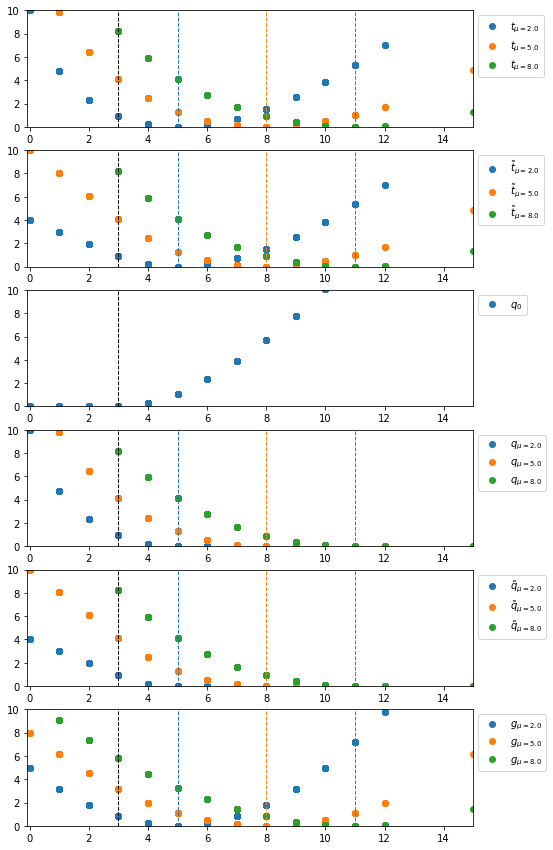

In [11]:
fig, ax = plt.subplots(nrows=6, figsize=(8,15))
ax = ax.flatten()
ax[2].scatter(n_ensemble, q0s, label=r'$q_{0}$')
for i, mu in enumerate(mus):
    ax[3].scatter(n_ensemble, qmus[mu], label=r'$q_{{\mu= {:.1f}}} $'.format(mu))
    ax[4].scatter(n_ensemble, qtildemus[mu], label=r'$\tilde{{q}}_{{\mu= {:.1f}}} $'.format(mu))
    ax[0].scatter(n_ensemble, tmus[mu], label=r'$t_{{\mu = {:.1f}}}$'.format(mu))
    ax[1].scatter(n_ensemble, ttildemus[mu], label=r'$\tilde{{t}}_{{\mu= {:.1f}}}$'.format(mu))
    ax[5].scatter(n_ensemble, gmus[mu], label=r'$g_{{\mu= {:.1f}}}$'.format(mu))
    ax[1].axvline(mu+b, c='C{}'.format(i), linestyle='--', linewidth=1)
    ax[0].axvline(mu+b, c='C{}'.format(i), linestyle='--', linewidth=1)
    ax[3].axvline(mu+b, c='C{}'.format(i), linestyle='--', linewidth=1)
    ax[4].axvline(mu+b, c='C{}'.format(i), linestyle='--', linewidth=1)
    ax[5].axvline(mu+b, c='C{}'.format(i), linestyle='--', linewidth=1)
#ax[2].scatter(n_ensemble, tmus, label=r'$t_{\mu}$')
ax[4].set_xlabel(r"$N_{obs}$")
#ax.set_ylabel('Test statistics')
for a in ax:
    a.legend(loc='upper left', bbox_to_anchor=(1,1))
    a.set_xlim(-0.1, 15)
    a.set_ylim(0.0, 10.0)
    a.axvline(b, linestyle='--', linewidth=1, c='k')
fig.savefig('./figures/test_statistics.pdf', bbox_inches='tight')

-----------------------------

## Comparing $t_{\mu}$ and $\tilde{t}_{\mu}$

Should be monotonic function of each other

Text(0,0.5,'$\\tilde{t}_{\\mu}$')

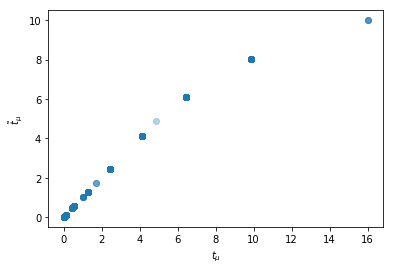

In [12]:
fig, ax = plt.subplots()
ax.scatter(tmus[5.0], ttildemus[5.0], alpha=0.3)
ax.set_xlabel(r"$t_{\mu}$")
ax.set_ylabel(r"$\tilde{t}_{\mu}$")

## Comparing simplified test statitic $g_{\mu}$ with $t_{\mu}$

For high $\lambda$, $t_{\mu}$ should converge to $g_{\mu}$.

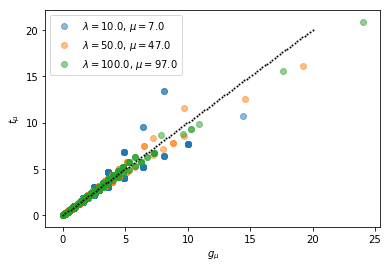

In [13]:
lambda_poissons = [10, 50, 100]
sample_size = 1
fig, ax = plt.subplots()
for i, lambda_poisson in enumerate(lambda_poissons):
    n_ensemble = np.array([scipy.stats.poisson.rvs(mu=lambda_poisson, size=sample_size) for i in range(nensemble)])
    mu = lambda_poisson-b
    tmu = np.array([model.calc_tmu(n,mu=mu) for n in n_ensemble])
    gmu = np.array([model.calc_gmu(n,mu=mu) for n in n_ensemble])
    c = "C{}".format(i)
    label = r"$\lambda = {:.1f}$, $\mu = {:.1f}$".format(lambda_poisson, mu)
    ax.scatter(gmu, tmu, c=c, alpha=0.5, label=label)

x = np.linspace(0.0, 20.0, 100)
ax.scatter(x,x, c='k', s=1)
ax.set_xlabel("$g_{\mu}$")
ax.set_ylabel("$t_{\mu}$")
ax.legend()